In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import glob
import os
import numpy as np

from salishsea_tools import visualisations, tidetools
from nowcast import analyze
%matplotlib inline

In [2]:
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
b, lons, lats = tidetools.get_bathy_data(bathy)

In [3]:
d1 = datetime.datetime(2015,1,1)
d2 = datetime.datetime(2015,12,31)


numdays = (d2-d1).days
dates = [d1 + datetime.timedelta(days=num)
         for num in range(0, numdays+1)]
dates.sort()

files = []
for d in dates:
    dtstr =d.strftime('%Y%m%d')
    files.append(glob.glob('/results/SalishSea/nowcast/*/SalishSea_1d_{}_{}_grid_T.nc'.format(dtstr,dtstr))[0])

# Salinity

In [4]:
month =1
f = nc.Dataset(files[0])
monthly_data = f.variables['vosaline'][:]
monthly_means= []

for i, d in enumerate(dates[1:]):
    m = d.month
    f = nc.Dataset(files[i+1])
    daily = f.variables['vosaline'][:]
    if m == month:
        monthly_data = np.concatenate((monthly_data,daily), axis=0)
    if m != month:
        print(month, monthly_data.shape)
        monthly_means.append(np.mean(monthly_data,axis=0))
        monthly_data = daily
        month = month+1

1 (31, 40, 898, 398)
2 (28, 40, 898, 398)
3 (31, 40, 898, 398)
4 (30, 40, 898, 398)
5 (31, 40, 898, 398)
6 (30, 40, 898, 398)
7 (31, 40, 898, 398)
8 (31, 40, 898, 398)
9 (30, 40, 898, 398)
10 (31, 40, 898, 398)
11 (30, 40, 898, 398)


In [5]:
monthly_means.append(np.mean(monthly_data,axis=0))

In [6]:
monthly_means = np.array(monthly_means)

In [7]:
annual_mean = np.mean(monthly_means, axis=0)

(420, 0)

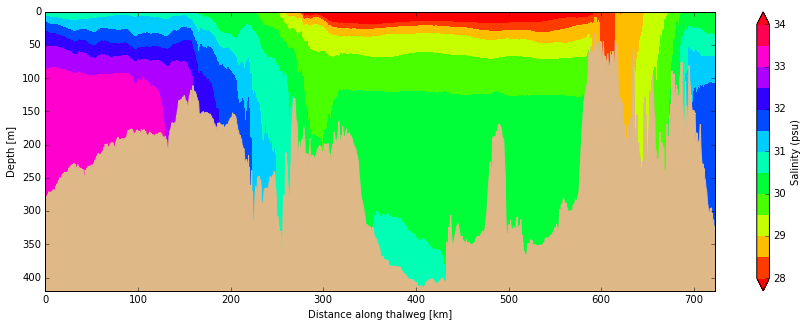

In [8]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, annual_mean, b, lons, lats, mesh_mask, 'gdept',
                                      np.arange(28,34.5,.5), cmap='hsv')
cbar.set_label('Salinity (psu)')
ax.set_ylim([420,0])

# Temperature

In [9]:
month =1
f = nc.Dataset(files[0])
monthly_data = f.variables['votemper'][:]
monthly_means= []

for i, d in enumerate(dates[1:]):
    m = d.month
    f = nc.Dataset(files[i+1])
    daily = f.variables['votemper'][:]
    if m == month:
        monthly_data = np.concatenate((monthly_data,daily), axis=0)
    if m != month:
        print(month, monthly_data.shape)
        monthly_means.append(np.mean(monthly_data,axis=0))
        monthly_data = daily
        month = month+1

1 (31, 40, 898, 398)
2 (28, 40, 898, 398)
3 (31, 40, 898, 398)
4 (30, 40, 898, 398)
5 (31, 40, 898, 398)
6 (30, 40, 898, 398)
7 (31, 40, 898, 398)
8 (31, 40, 898, 398)
9 (30, 40, 898, 398)
10 (31, 40, 898, 398)
11 (30, 40, 898, 398)


In [10]:
monthly_means.append(np.mean(monthly_data,axis=0))

In [11]:
monthly_means = np.array(monthly_means)

In [12]:
annual_mean_temp = np.mean(monthly_means, axis=0)

(420, 0)

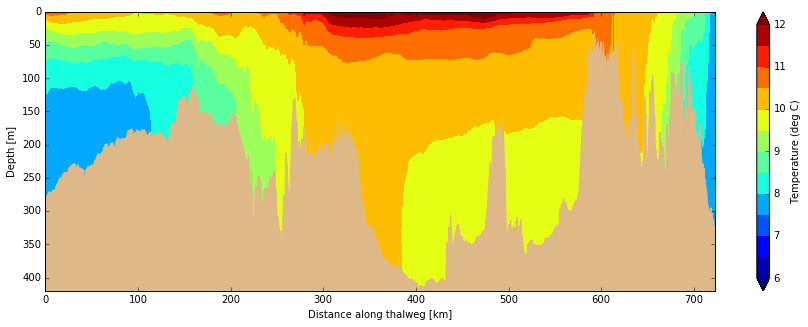

In [13]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = visualisations.contour_thalweg(ax, annual_mean_temp, b, lons, lats, 
                                      mesh_mask, 'gdept',np.arange(6,12.5,.5), cmap='jet')
cbar.set_label('Temperature (deg C)')
ax.set_ylim([420,0])

# One Figure

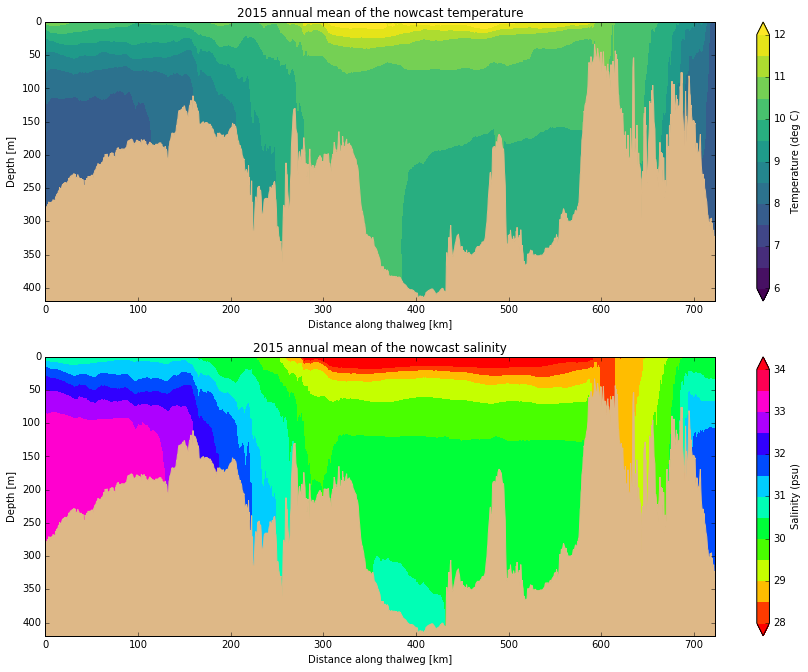

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(15,11))
ax=axs[0]
cbar = visualisations.contour_thalweg(ax, annual_mean_temp, b, lons, lats, 
                                      mesh_mask, 'gdept',np.arange(6,12.5,.5), cmap='viridis')
cbar.set_label('Temperature (deg C)')
ax.set_ylim([420,0])
ax.set_title('2015 annual mean of the nowcast temperature')
ax=axs[1]
cbar = visualisations.contour_thalweg(ax, annual_mean, b, lons, lats, mesh_mask, 'gdept',
                                      np.arange(28,34.5,.5), cmap='hsv')
cbar.set_label('Salinity (psu)')
ax.set_ylim([420,0])
ax.set_title('2015 annual mean of the nowcast salinity')

# Summary
Compared to observations in Pena et al (2016), the nowcast is
* Too fresh and warm in SoG basin --> Pena has 31 psu below 300 m, we have 30.5 psu. At 100 m, Pena has 30.5 psu salinity by we have 30 psu. Pena's temp below 100m does not exceed 9.5 deg C, but we are between 9.5 deg C and 10.5 deg C. 
* Too fresh and warm in deep SJDF -- Pena's below 100 m is > 33.5 psu and < 7.5 deg C. We are between 33 psu and 33.5 psu and 7.5 deg C and 8.5 deg C.
* Too fresh and warm in SJDF surface --> Pena has 31.5 psu at surface, we have 31 psu or less.
* Probably too warm in in SoG surface --> Pena has 10.5 deg C only very close to the surace but our 10.5 contour is 50 m deep. Alos, our 28 psu contour covers are larger lateral area than Pena's. Hers is confined to SoG central basin but ours extenda all that way to Seymour Narrows. 